# Preliminares

In [1]:
# -*- coding: utf-8 -*-
"""
Covid e Economia

Carlos Góes
"""

"""
Inputs
"""

Path = r'C:\Users\Carlos\OneDrive - UC San Diego\Globo\Covid-e-Economia'
File = 'WEOhistorical.xlsx'
FileWorldInData = 'covid-deaths-daily-vs-total-per-million.csv'
FileWorldBank = 'API_SP.POP.TOTL_DS2_en_excel_v2_1926530.xls'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(Path)

# Organizar dados

Essa parte organiza dos dados de previsão do WEO para 2020, importa dados de mortes por milhão (Our World in Data) e população (Banco Mundial). Após colocar tudo no mesmo dataframe, restringe-se a amostra para somente para países da OCDE, para tentar preservar alguma comparatividade demográfica.

In [2]:
FrameWEO = pd.read_excel(File, na_values='.', sheet_name='ngdp_rpch')
FrameWEO = FrameWEO[['country', 'WEO_Country_Code', 'ISOAlpha_3Code', 'year', 'F2019ngdp_rpch', 'F2020ngdp_rpch']]
FrameWEO = FrameWEO[ FrameWEO['year'] == 2020 ]
FrameWEO = FrameWEO[['ISOAlpha_3Code', 'F2019ngdp_rpch', 'F2020ngdp_rpch']]

FrameWID = pd.read_csv(FileWorldInData)
FrameWID = FrameWID[ FrameWID['Date'] == '2020-12-31' ]
FrameWID = (FrameWID[[ 'Code', 'Total confirmed deaths due to COVID-19 per million people' ]]
            .rename(columns={'Total confirmed deaths due to COVID-19 per million people': 'DeathRate'})
            )

FrameWB = pd.read_excel(FileWorldBank, sheet_name='Data', header=3)
FrameWB = FrameWB[['Country Code', '2019']].rename(columns={'Country Code': 'Code',
                                                            '2019': 'Population'})

Frame = (pd.merge(FrameWEO, FrameWID, left_on='ISOAlpha_3Code', right_on='Code')
         .merge(FrameWB, on='Code')
         )

Oecd = ['AUS','AUT','BEL', 'CAN', 'CHL', 'COL', 'CHE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN',
        'ISL','IRL','ISR','ITA','JPN','KOR','LVA','LUX','MEX','NLD','NZL','NOR','POL','PRT','SVK',
        'SVN','ESP','SWE','TUR','GBR','USA']

# Restringir para OCDE

Frame = Frame[ Frame['Code'].isin(Oecd) ]

# Erros de previsão

Calcula-se os erros de previsão para 2020 (previsões Outubro de 2020 - Outubro de 2019), exporta-se para um csv.

In [3]:
Frame['ForecastError'] = Frame['F2020ngdp_rpch'] - Frame['F2019ngdp_rpch']

Frame.to_csv(os.path.join(Path,'ScatterPlotRaw.csv'))

# Scatterplot

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


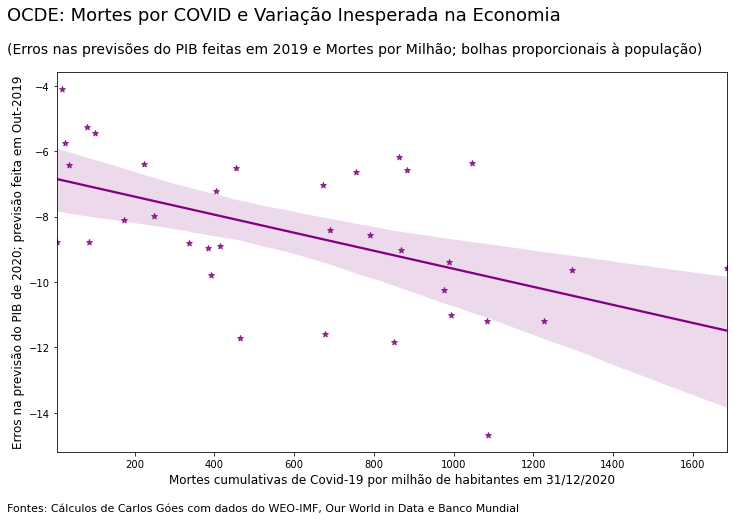

In [4]:
fig, ax = plt.subplots(figsize=(12,7))
sns.regplot('DeathRate', 'ForecastError', data=Frame, color='purple', marker='*')

ax.set_xlabel('Mortes cumulativas de Covid-19 por milhão de habitantes em 31/12/2020', fontsize=12)
ax.set_ylabel('Erros na previsão do PIB de 2020; previsão feita em Out-2019', fontsize=12)

ax.text(x = -120, y=-2, s='OCDE: Mortes por COVID e Variação Inesperada na Economia', fontsize=18)
ax.text(x = -120, y=-3, s='(Erros nas previsões do PIB feitas em 2019 e Mortes por Milhão; bolhas proporcionais à população)', fontsize=14)

ax.text(x = -120, y=-17, s='Fontes: Cálculos de Carlos Góes com dados do WEO-IMF, Our World in Data e Banco Mundial', fontsize=11)

plt.show()